## 策略設計：結合產業輪動與景氣信號燈的資產配置模型

在產業輪動的脈絡中，我們觀察到一項耐人尋味的現象：**航運指數的轉強，似乎經常領先於半導體的上漲**。這樣的關聯性若能被驗證並轉化為可操作的邏輯，便可能成為投資決策中的寶貴線索。

本篇將以前文《從數據觀察產業輪動：解構航運與半導體的領先與落後關係》的實證分析為基礎，進一步探討如何將「航運領先、半導體跟隨」的輪動假說，轉化為具體的資產配置策略。

我們將結合景氣燈號、產業表現指標與時序條件，建構一套回測框架，模擬歷史期間的實際操作情境。透過策略績效的評估，本文希望回答一個核心問題：

> **若航運真的能預告半導體行情，我們該如何利用此種輪動關係獲取利益**

為了避免誤用訓練集資料，我們使用 2020 年以後的市場資料作為策略回測的研究對象，期望讓策略分析更加可靠。

---

### 策略邏輯說明：搭配景氣信號燈

根據《從景氣燈號到資產輪動：一套避開熊市的量化策略》一文結果，透過景氣信號燈可有效避開熊市的波動，在牛市持有股票部位、熊市轉為短天期國債配置。

搭配前述觀察的產業輪動現象「航運 → 半導體」，我們在牛市階段觀察到產業輪動的信號時，將原本持有的 0050 ETF 短期置換為半導體類股，賺取資金輪動報酬後再換回 0050 ETF。期望此操作可優化策略績效表現。

策略比較基準為台股加權報酬率指數（IR0001），以下簡稱「大盤」。

---

### 策略實作規則

1. **市場條件判定**：當景氣信號燈處於「上升階段」時，進入股票投資期。
2. **輪動啟動條件**：
    - 若航運產業 RSI 數值 > 65，則代表該產業進入高點，輪動開始。
3. **資產配置轉換**：
    - 於輪動啟動條件成立時，將原持有之 0050 ETF 換為半導體類股。
4. **輪動終止條件**：
    - 當半導體指數 RSI 相對於買入時上升 15，視為輪動結束，轉回 0050。
5. **熊市進場限制**：
    - 若市場重新進入熊市階段，則平倉所有股票，轉為短天期國債部位。

---

### 半導體類股組成

為模擬半導體資產配置，選取 10 檔具有代表性的台灣半導體個股，涵蓋上中下游完整供應鏈：

- **晶圓代工**：
  - 台積電（2330）
  - 聯電（2303）
  - 世界先進（5347）

- **IC 設計**：
  - 聯發科（2454）
  - 聯詠（3034）
  - 天鈺（4961）

- **封裝與測試**：
  - 日月光投控（3711）
  - 力成（6239）
  - 欣銓（3264）

- **記憶體**：
  - 南亞科（2408）

這些成分股不僅具有產業代表性，亦具備良好的流動性與市值，適合用於實證回測與策略模擬。


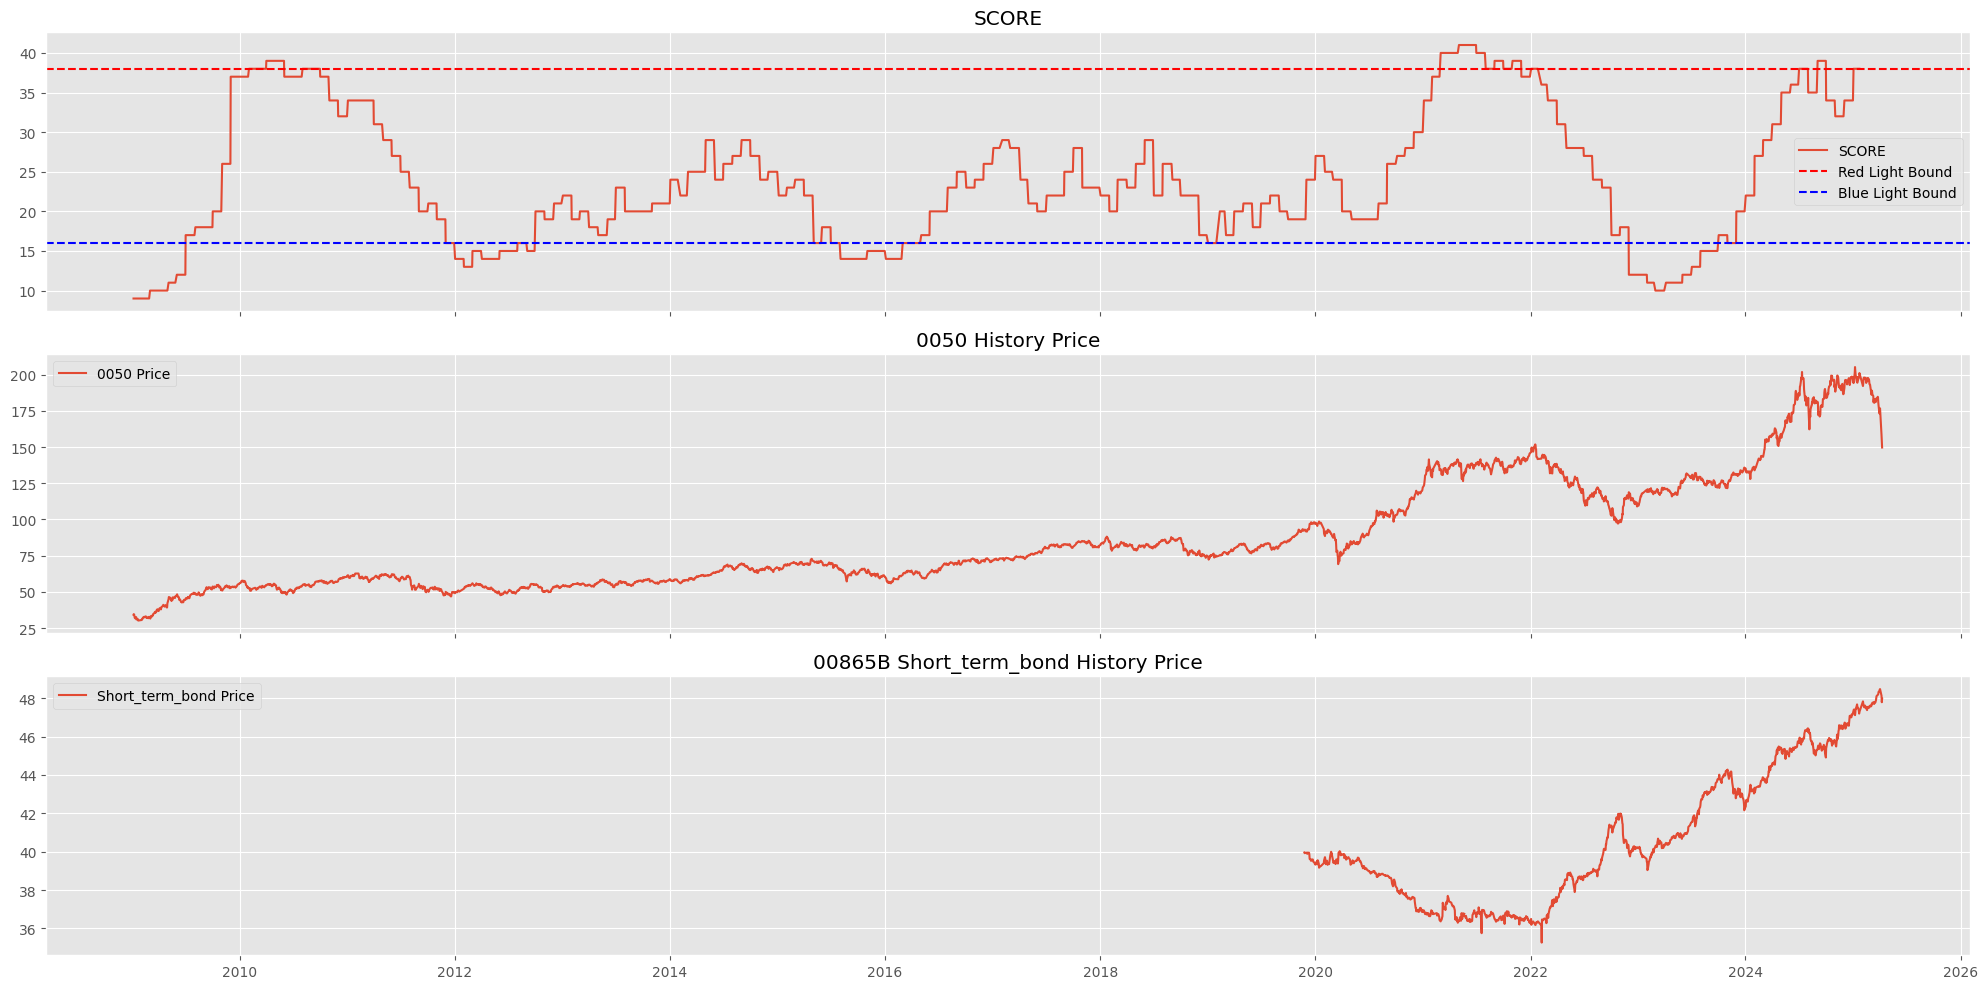

In [8]:
import pandas as pd

df = pd.read_csv('eco_data.csv')
df['mdate'] = pd.to_datetime(df['mdate'])
df['mdate'] = df['mdate'].dt.strftime('%Y-%m-%d')
df['mdate'] = pd.to_datetime(df['mdate'])


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10), sharex=True)
plt.style.use('ggplot')
axes[1].plot(df['mdate'], df['avgclsd'], label = '0050 Price')
axes[1].set_title(f'0050 History Price')
axes[1].legend()

axes[0].plot(df['mdate'], df['val_shifted'], label = 'SCORE')
axes[0].axhline(y = 38, label = 'Red Light Bound', color = 'red', linestyle = '--')
axes[0].axhline(y= 16, label = 'Blue Light Bound', color = 'blue', linestyle = '--')
axes[0].set_title(f'SCORE')
axes[0].legend()

axes[2].plot(df['mdate'], df['avgclsd_bond'], label = 'Short_term_bond Price')
axes[2].set_title(f'00865B Short_term_bond History Price')
axes[2].legend()

plt.tight_layout()
plt.show()

In [9]:
df.sort_values('mdate')

,mdate,mdate.1,close_d,avgclsd,coid,mdate_P,val,pfr,val_shifted,mdate_bond,close_d_bond,avgclsd_bond
0,2009-01-05,2009-01-05,34.20,34.3005,EA1101,2009-01-01 00:00:00+00:00,9.0,P,9.0,NaN,NaN,NaN
1,2009-01-06,2009-01-06,34.18,34.2079,EA1101,2009-01-01 00:00:00+00:00,9.0,P,9.0,NaN,NaN,NaN
2,2009-01-07,2009-01-07,34.63,34.5850,EA1101,2009-01-01 00:00:00+00:00,9.0,P,9.0,NaN,NaN,NaN
3,2009-01-08,2009-01-08,32.43,33.2064,EA1101,2009-01-01 00:00:00+00:00,9.0,P,9.0,NaN,NaN,NaN
4,2009-01-09,2009-01-09,32.22,32.3155,EA1101,2009-01-01 00:00:00+00:00,9.0,P,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,2025-04-01,2025-04-01,176.30,175.3359,NaN,NaN,NaN,NaN,NaN,2025-04-01 00:00:00+00:00,48.48,48.4536
3988,2025-04-02,2025-04-02,176.00,176.6546,NaN,NaN,NaN,NaN,NaN,2025-04-02 00:00:00+00:00,48.47,48.4749
3989,2025-04-07,2025-04-07,158.40,158.4013,NaN,NaN,NaN,NaN,NaN,2025-04-07 00:00:00+00:00,48.19,48.1306
3990,2025-04-08,2025-04-08,153.25,153.2636,NaN,NaN,NaN,NaN,NaN,2025-04-08 00:00:00+00:00,47.95,47.7912


In [10]:
df_ind = pd.read_csv(f'產業指數rsi.csv')
df_ind['mdate'] = pd.to_datetime(df_ind['日期'])
df_ind['mdate'] = df_ind['mdate'].dt.strftime('%Y-%m-%d')
df_ind['mdate'] = pd.to_datetime(df_ind['mdate'])

In [11]:
print(df_ind)

              日期     IX0002     IX0003     IX0006     IX0010     IX0011  \
0     2006-01-02        NaN        NaN        NaN        NaN        NaN   
1     2006-01-03        NaN        NaN        NaN        NaN        NaN   
2     2006-01-04        NaN        NaN        NaN        NaN        NaN   
3     2006-01-05        NaN        NaN        NaN        NaN        NaN   
4     2006-01-06        NaN        NaN        NaN        NaN        NaN   
...          ...        ...        ...        ...        ...        ...   
4741  2025-04-17  39.808759  42.263301  44.410173  50.646931  47.787684   
4742  2025-04-18  40.128235  42.444666  44.842384  51.085822  47.761767   
4743  2025-04-21  40.703713  42.950569  45.365994  50.507269  47.914086   
4744  2025-04-22  39.056285  41.720304  43.409021  49.456522  47.224060   
4745  2025-04-23  42.541115  43.858367  45.953375  49.870426  49.838774   

         IX0012     IX0016     IX0017     IX0018  ...     IX0032     IX0033  \
0           NaN     

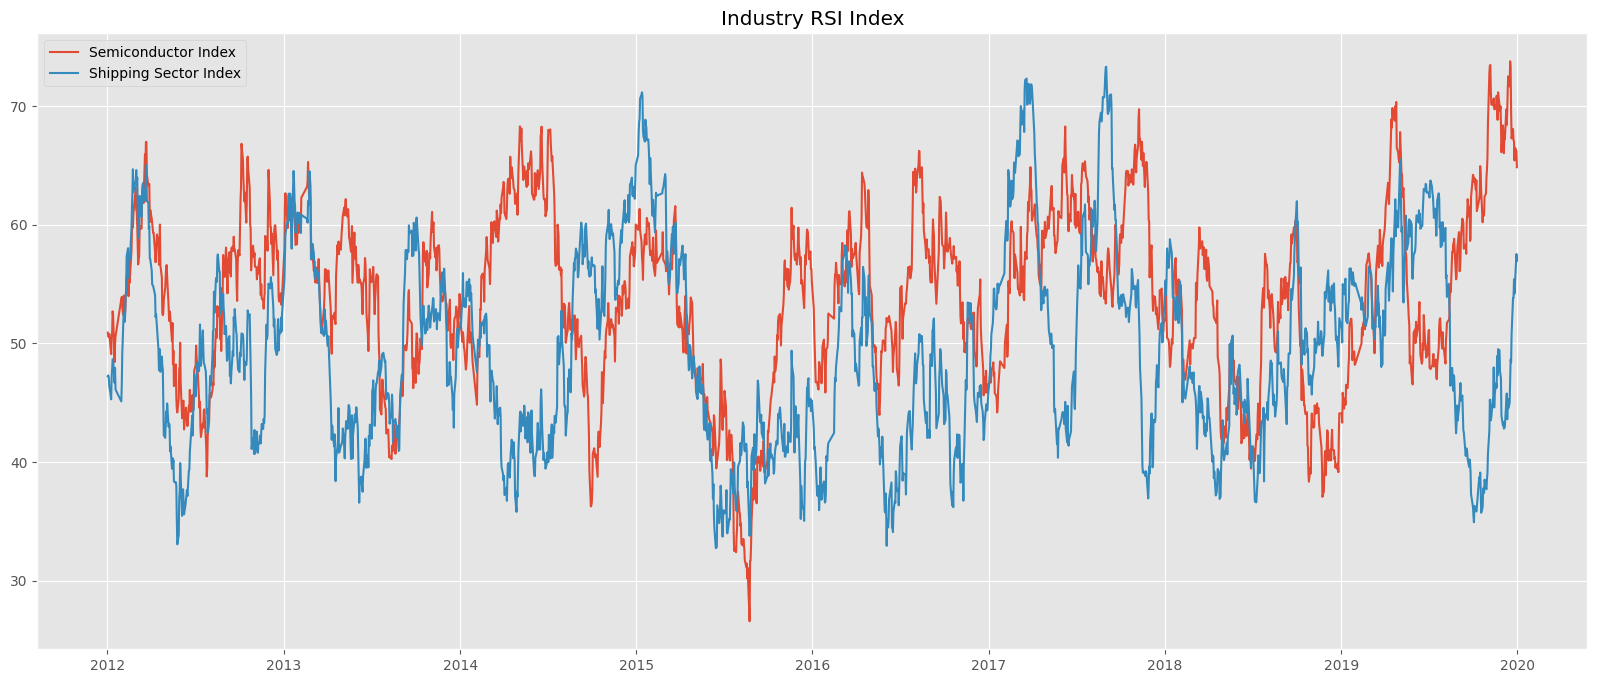

In [12]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 8))
df_plot = df_ind[df_ind['mdate'] <= '2020-01-01'].copy()
df_plot = df_plot[df_plot['mdate'] >= '2012-01-01'].copy()
plt.plot(df_plot['mdate'], df_plot["IX0028"], label = 'Semiconductor Index')
#plt.plot(df_plot['mdate'], df_plot["IX0039"], label = 'Financial & Insurance Index')
plt.plot(df_plot['mdate'], df_plot["IX0037"], label = 'Shipping Sector Index')
plt.title(f'Industry RSI Index')
plt.legend()
plt.show()

In [ ]:
import os
import tejapi
plt.rcParams['font.family'] = 'Arial'
tej_key = 'your key'
os.environ['TEJAPI_BASE'] = "https://api.tej.com.tw"
os.environ['TEJAPI_KEY'] = tej_key

from zipline.data.run_ingest import simple_ingest
from zipline.api import set_slippage, set_commission, set_benchmark,  symbol,  record
from zipline.api import order_target_percent, order_percent, order
from zipline.api import set_long_only, set_max_leverage


from zipline.finance import commission, slippage
from zipline import run_algorithm


semiconductor_stocks = [
    '2330',  # 台積電：晶圓代工龍頭
    '2303',  # 聯電：成熟製程晶圓代工
    '2408',  # 南亞科：DRAM 記憶體
    '3711',  # 日月光投控：封裝與測試
    '3034',  # 聯詠：顯示器 IC 設計
    '2454',  # 聯發科：手機與通訊 IC 設計大廠
    '5347',  # 世界先進：8 吋晶圓代工
    '6239',  # 力成：封裝測試服務
    '3264',  # 欣銓：測試服務為主
    '4961'   # 天鈺：顯示驅動 IC
]
pool = ['0050', 'IR0001', '00865B'] + ['2603', '2609'] +  ['6446', '6919','6472']  + semiconductor_stocks
start_date = '2009-01-01'
end_date = '2025-04-30'
start_ingest = start_date.replace('-', '')
end_ingest = end_date.replace('-', '')

simple_ingest(name = 'tquant' , tickers = pool , start_date = start_ingest , end_date = end_ingest)

print(pool)

Now ingesting data.


[2025-05-08 06:58:32.328871] INFO: zipline.data.bundles.core: Ingesting tquant.


Merging daily equity files:
Currently used TEJ API key call quota 189/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 62794144/9223372036854775807 (0.0%)


[2025-05-08 06:58:37.405658] INFO: zipline.data.bundles.core: Ingest tquant successfully.


End of ingesting tquant.
Please call function `get_bundle(start_dt = pd.Timestamp('20090101', tz = 'utc'),end_dt = pd.Timestamp('20250430' ,tz = 'utc'))` in `zipline.data.data_portal` to check data.
Currently used TEJ API key call quota 189/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 62794144/9223372036854775807 (0.0%)
['0050', 'IR0001', '00865B', '2603', '2609', '6446', '6919', '6472', '2330', '2303', '2408', '3711', '3034', '2454', '5347', '6239', '3264', '4961']


In [14]:
def initialize(context, pool = pool):

   set_slippage(slippage.TW_Slippage(spread = 0.3 , volume_limit = 1))
   set_commission(commission.Custom_TW_Commission(min_trade_cost=20, discount=1.0, tax = 0.003))
   set_benchmark(symbol('IR0001'))

   context.i = 0
   context.pool  = pool
   context.state = False
   context.score = None
   context.hedge_state = None

   context.buy_date = []
   context.sell_date = []

   context.a = 0
   context.b = 0

   context.bond = symbol('00865B')
   context.stock = symbol('0050')
   context.market = 'bull'

   context.semi = None
   context.bio = None
   context.boat = None
   context.cycle1 = False
   context.cycle2 = False

   context.aa = 0
   context.bb = 0

   context.cycle_start_date = []
   context.cycle_end_date = []


def handle_data(context, data, score_data = df, ind_data = df_ind):
   backtest_date = data.current_dt.date()
   today_data = score_data[score_data['mdate'] == pd.to_datetime(backtest_date)]
   context.last_score = context.score  # 記錄舊的 score


   if not today_data.empty:
      context.score = today_data['val_shifted'].iloc[-1]
   else:
      # 若無資料，就沿用舊的 score
      context.score = context.last_score

   today_data_2 = ind_data[ind_data['mdate'] == pd.to_datetime(backtest_date)]
   context.semi = today_data_2["IX0028"].iloc[-1]
   context.bio = today_data_2['IX0021'].iloc[-1]
   context.boat = today_data_2['IX0037'].iloc[-1]
   record(score = context.score)



   if context.state == True:

      # ==================================================================
      if context.boat >= 60 and context.cycle2 == False :
         print(f'{backtest_date} : Cycle 2 Start')
         context.cycle_start_date.append(pd.to_datetime(backtest_date))
         context.cycle2 = True
         order_target_percent(symbol('0050'), 0)
         for i in semiconductor_stocks:
            order_target_percent(symbol(i), 1.0 / len(semiconductor_stocks))
         context.a = context.semi

      if context.cycle2 == True and context.semi >= context.a + 15:
         print(f'{backtest_date} : Cycle 2 End')
         context.cycle_end_date.append(pd.to_datetime(backtest_date))
         context.cycle2 = False
         for i in semiconductor_stocks:
            order_target_percent(symbol(i), 0)
         order_target_percent(symbol('0050'), 1.0)

      
      # ==================================================================


   if context.hedge_state == True and context.cycle2 == True:
      print(f'Bull Market Ending')
      #context.end_date.append(pd.to_datetime(backtest_date))
      for i in semiconductor_stocks:
         order_target_percent(symbol(i), 0)
      order_target_percent(symbol('0050'), 0)
      context.cycle2 = False


   
   # ==================================================================


   if context.score <= 16 and context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

      if context.hedge_state == True:
         order_target_percent(context.bond, 0)
         print(f"Date: {backtest_date}, Score: {context.score}，賣出債券")
         context.hedge_state = False


   if context.score >= 38 and context.state == True:
      order_target_percent(context.stock, 0)
      print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
      context.sell_date.append(pd.to_datetime(backtest_date))
      context.state = False

      if context.hedge_state == False :
         order_target_percent(context.bond, 1.0)
         print(f"Date: {backtest_date}, Score: {context.score}，買入債券避險")
         context.hedge_state = True



   if context.score > 16 and context.score < 38 and context.aa == 0:
      context.aa = 1
      print('進入景氣循環')
      if context.state == False:
         order_target_percent(context.stock, 1.0)
         print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050 ETF")
         context.buy_date.append(pd.to_datetime(backtest_date))
         context.state = True

  # 因為 00685B 從 2019-11-25 才開始被交易
   if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.bb == 0:
     context.bb = 1
     context.hedge_state = False

   record(Leverage = context.account.leverage)
      


進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050 ETF
2020-06-11 : Cycle 2 Start
2020-07-27 : Cycle 2 End
2020-09-07 : Cycle 2 Start
Date: 2021-03-02, Score: 40.0, 賣出 0050
Date: 2021-03-02, Score: 40.0，買入債券避險
Bull Market Ending
Date: 2022-12-01, Score: 12.0, 買進 0050
Date: 2022-12-01, Score: 12.0，賣出債券
2023-12-21 : Cycle 2 Start
Date: 2024-07-01, Score: 38.0, 賣出 0050
Date: 2024-07-01, Score: 38.0，買入債券避險
Bull Market Ending


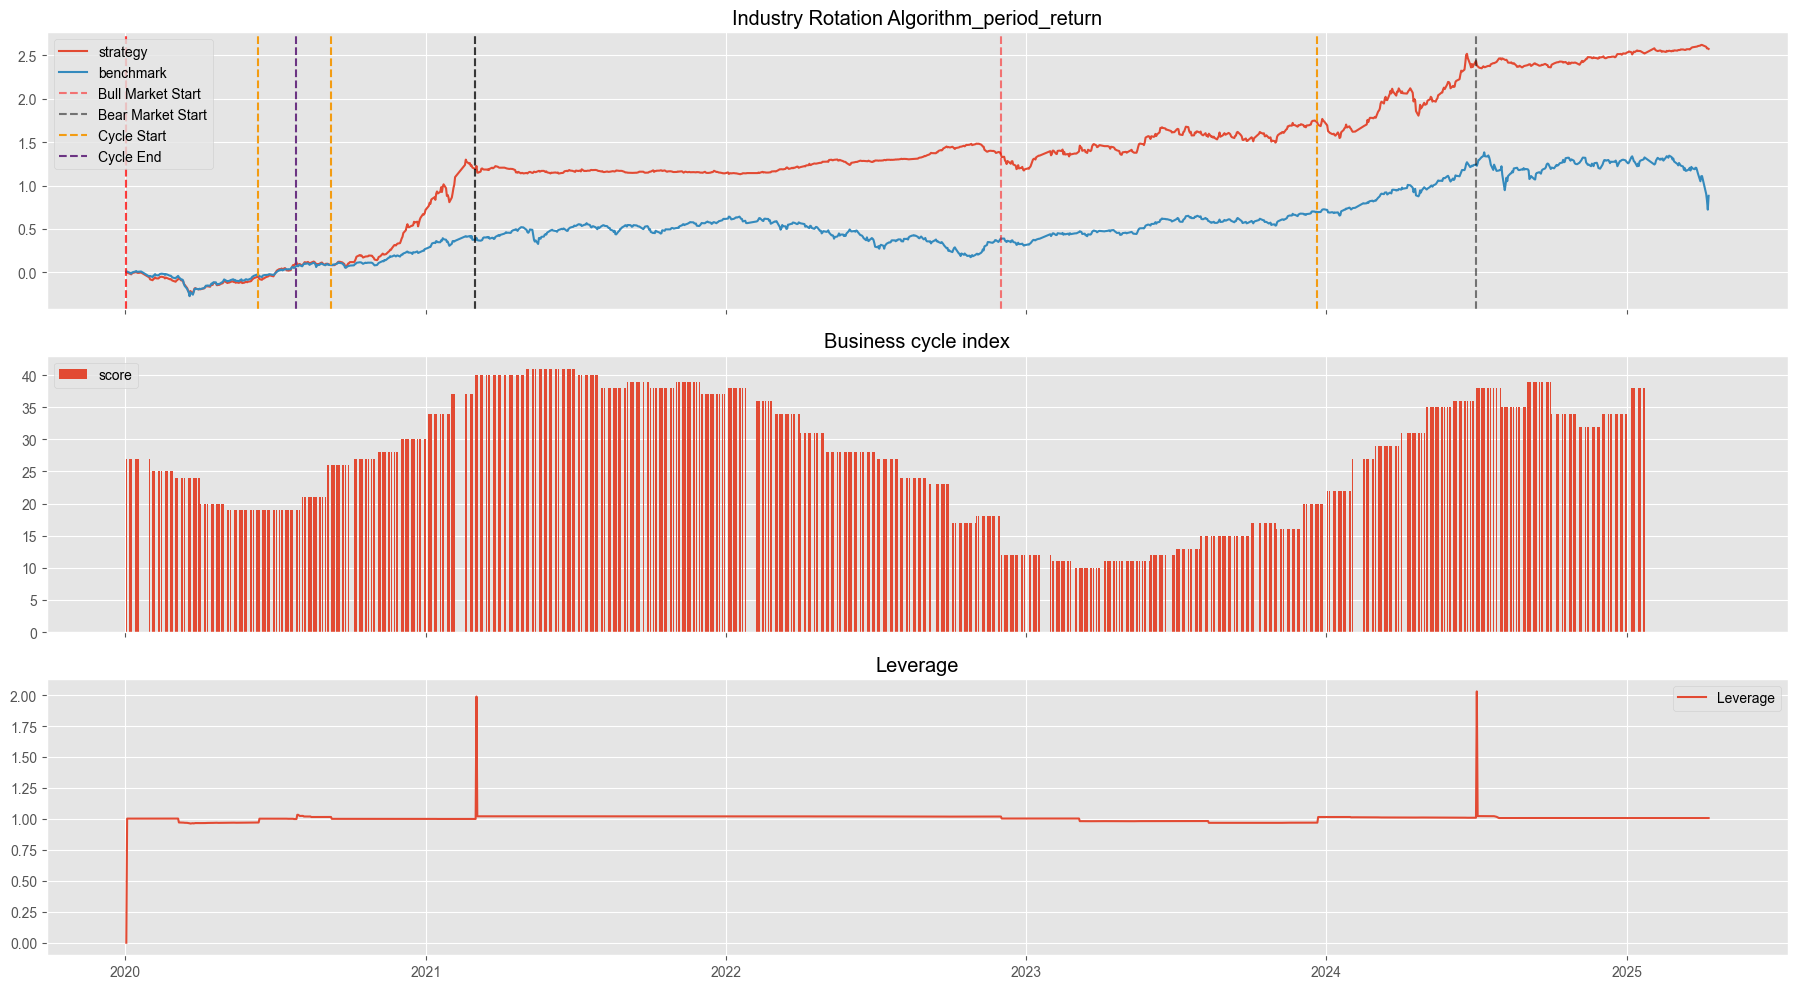

Index(['period_open', 'period_close', 'orders', 'longs_count', 'long_exposure',
       'starting_exposure', 'treasury_return', 'transactions',
       'portfolio_value', 'net_leverage', 'starting_cash', 'gross_leverage',
       'short_value', 'benchmark_return', 'pnl', 'short_exposure',
       'capital_used', 'starting_value', 'long_value', 'positions',
       'ending_cash', 'ending_exposure', 'returns', 'ending_value',
       'shorts_count', 'score', 'Leverage', 'period_label', 'max_drawdown',
       'alpha', 'beta', 'trading_days', 'treasury_period_return',
       'max_leverage', 'sharpe', 'benchmark_period_return', 'excess_return',
       'benchmark_volatility', 'algo_volatility', 'sortino',
       'algorithm_period_return'],
      dtype='object')


In [138]:
def analyze(context, perf):
  plt.style.use('ggplot')
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10), sharex=True)


  axes[0].plot(perf.index, perf['algorithm_period_return'], label = 'strategy')
  axes[0].plot(perf.index, perf['benchmark_period_return'], label = 'benchmark')

  for idx, i in enumerate(context.buy_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'red', label = 'Bull Market Start', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'red', linestyle = '--', alpha = 0.5)

  for idx, i in enumerate(context.sell_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'black', label = 'Bear Market Start', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'black', linestyle = '--', alpha = 0.5)

  for idx, i in enumerate(context.cycle_start_date):
    if idx == 0:
      axes[0].axvline(x = i, linestyle = '--', color = '#F39C12', label = 'Cycle Start')
    else:
      axes[0].axvline(x = i, linestyle = '--', color = '#F39C12')

  for idx, i in enumerate(context.cycle_end_date):
    if idx == 0:
      axes[0].axvline(x = i, linestyle = '--', color = '#6C3483', label = 'Cycle End')
    else:
      axes[0].axvline(x = i, linestyle = '--', color = '#6C3483')
        
  axes[0].set_title(f'Industry Rotation Algorithm_period_return')
  axes[0].legend()  

  axes[1].bar(perf.index, perf['score'], label='score')
  axes[1].set_title('Business cycle index')
  axes[1].legend()
  

  axes[2].plot(perf.index, perf['Leverage'], label = 'Leverage')
  axes[2].set_title('Leverage')
  axes[2].legend()
  plt.tight_layout()
  plt.show()
  print(perf.columns)


results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-10', tz = 'utc'),
            initialize = initialize,
            handle_data = handle_data,
            analyze = analyze,
            bundle = 'tquant',
            capital_base = 1e5)

### 策略績效解讀

從第一張圖的策略績效比較來看，在整段牛市期間共偵測到三次「航運 → 半導體」的產業輪動信號（橘色線顯示的時間點）。其中，前兩次出現在 2020 年，第三次則發生於較後期。

整體而言，這三次輪動信號中，有兩次成功捕捉到半導體類股的強勁上漲趨勢，分別為第二次與第三次。其中第二次進場效果最為顯著，使得策略的累積報酬率大幅超越台股大盤（Benchmark），達成我們預期透過輪動機制提升超額報酬的目標。第三次雖也成功搭上半導體上漲波段，但由於當時整體台股行情主要由半導體所驅動，因此策略相較於大盤的超額報酬上漲力度有限。

---

第二張圖呈現回測期間的景氣指數（score），對應每次景氣輪動信號的背景經濟環境。可以發現，每次策略進場時機大多落在景氣由谷底回升或進入擴張的初期階段，符合經濟循環與資金輪動的邏輯。

---

第三張圖則顯示策略於整段回測期間的槓桿使用情況。除了兩個時間點因牛熊轉換而發生的換倉操作使槓桿瞬間升高至 2.0，其餘大多數期間均維持在 1.0 左右，顯示整體策略並未依賴過度槓桿來強化績效，槓桿使用風險控制得宜。


Start date,2020-01-02
End date,2025-04-10
Total months,60
,Backtest
Annual return,28.584%
Cumulative returns,257.524%
Annual volatility,16.179%
Sharpe ratio,1.64
Calmar ratio,1.04
Stability,0.81
Max drawdown,-27.601%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.60,2020-01-14,2020-03-19,2020-07-03,111
1,12.46,2022-11-04,2022-12-29,2023-05-19,126
2,10.22,2021-01-22,2021-01-29,2021-02-05,11
3,10.10,2024-04-12,2024-04-22,2024-05-23,29
4,7.96,2023-12-27,2024-01-17,2024-02-23,35


Top 10 long positions of all time,max
sid,
0050,103.36%
00865B,102.27%
4961,30.08%
2303,15.56%
5347,14.71%
2330,13.40%
6239,12.27%
2408,12.05%
3034,11.99%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
0050,103.36%
00865B,102.27%
4961,30.08%
2303,15.56%
5347,14.71%
2330,13.40%
6239,12.27%
2408,12.05%
3034,11.99%


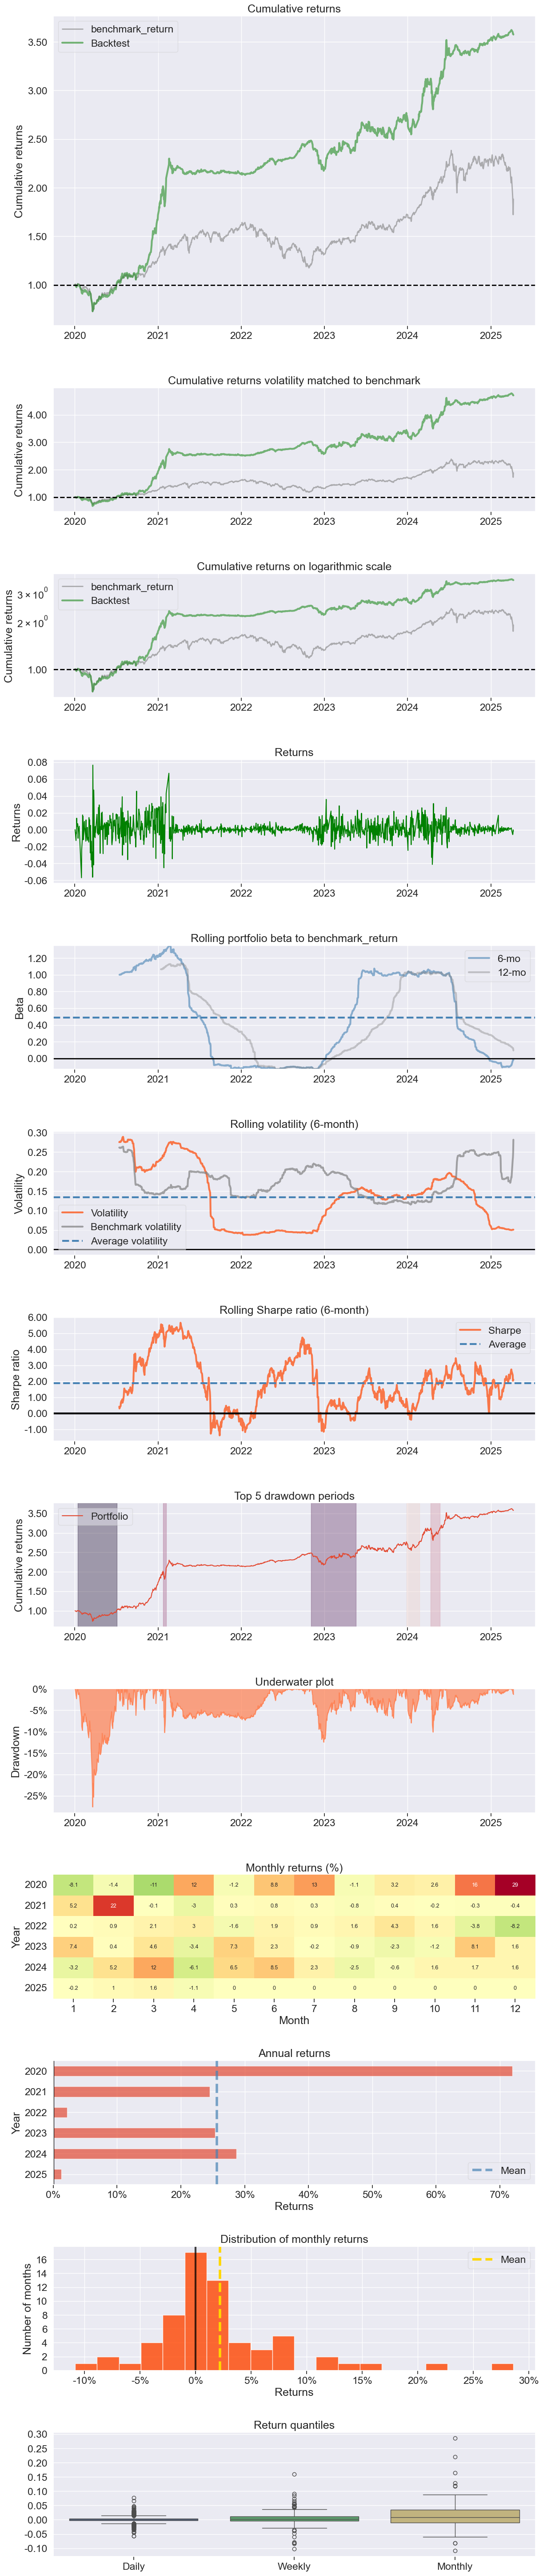

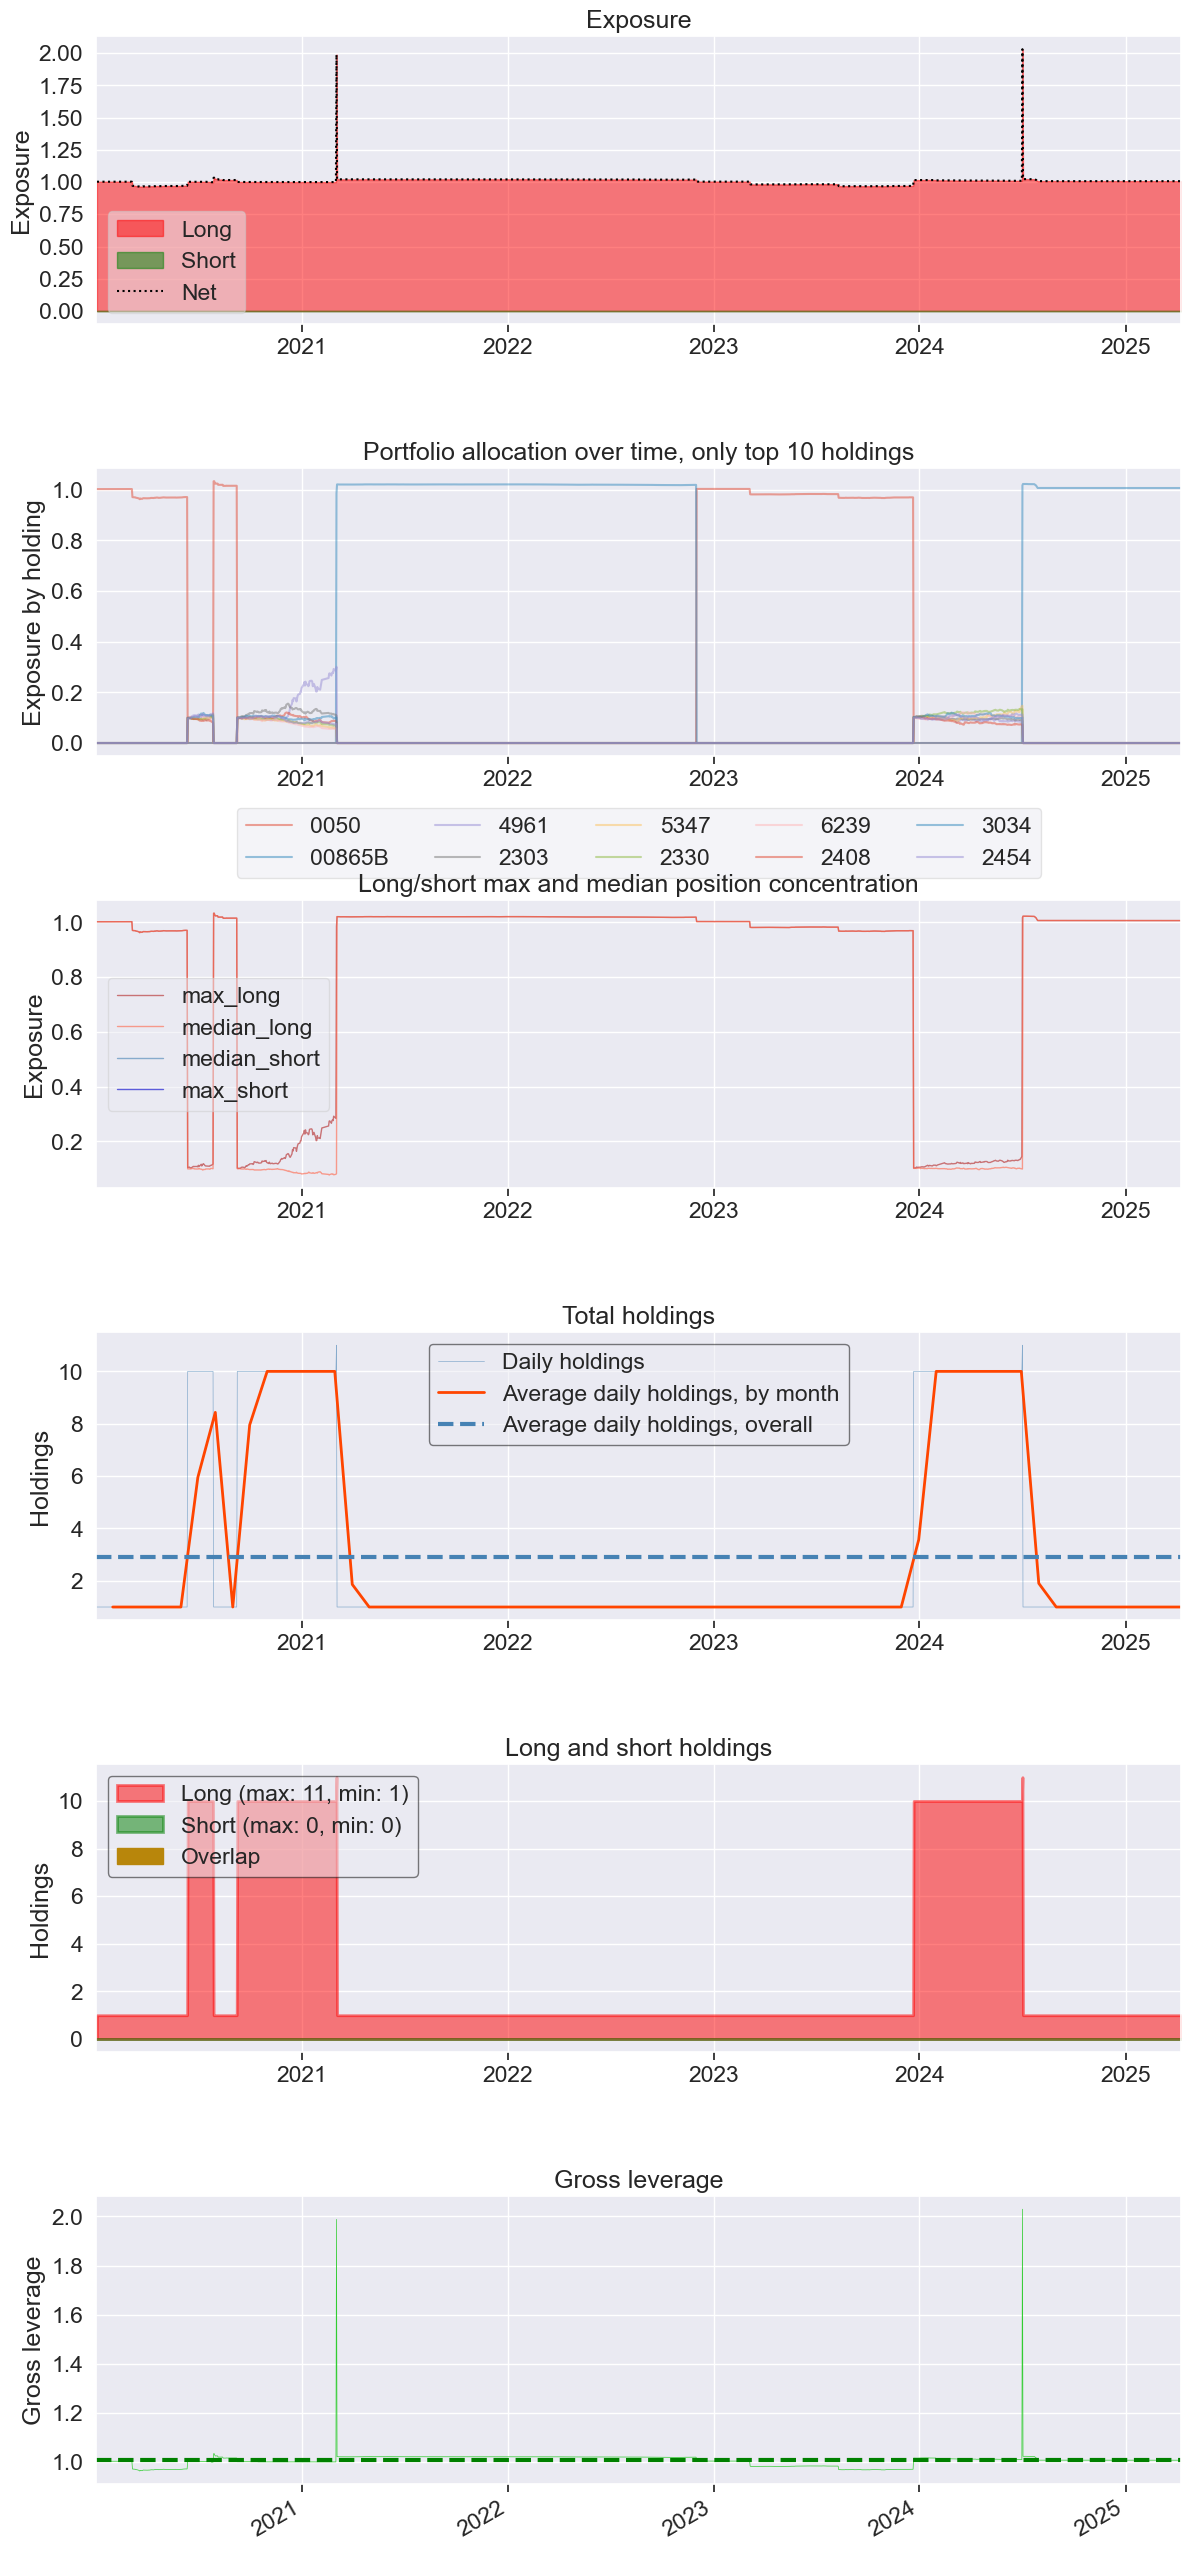

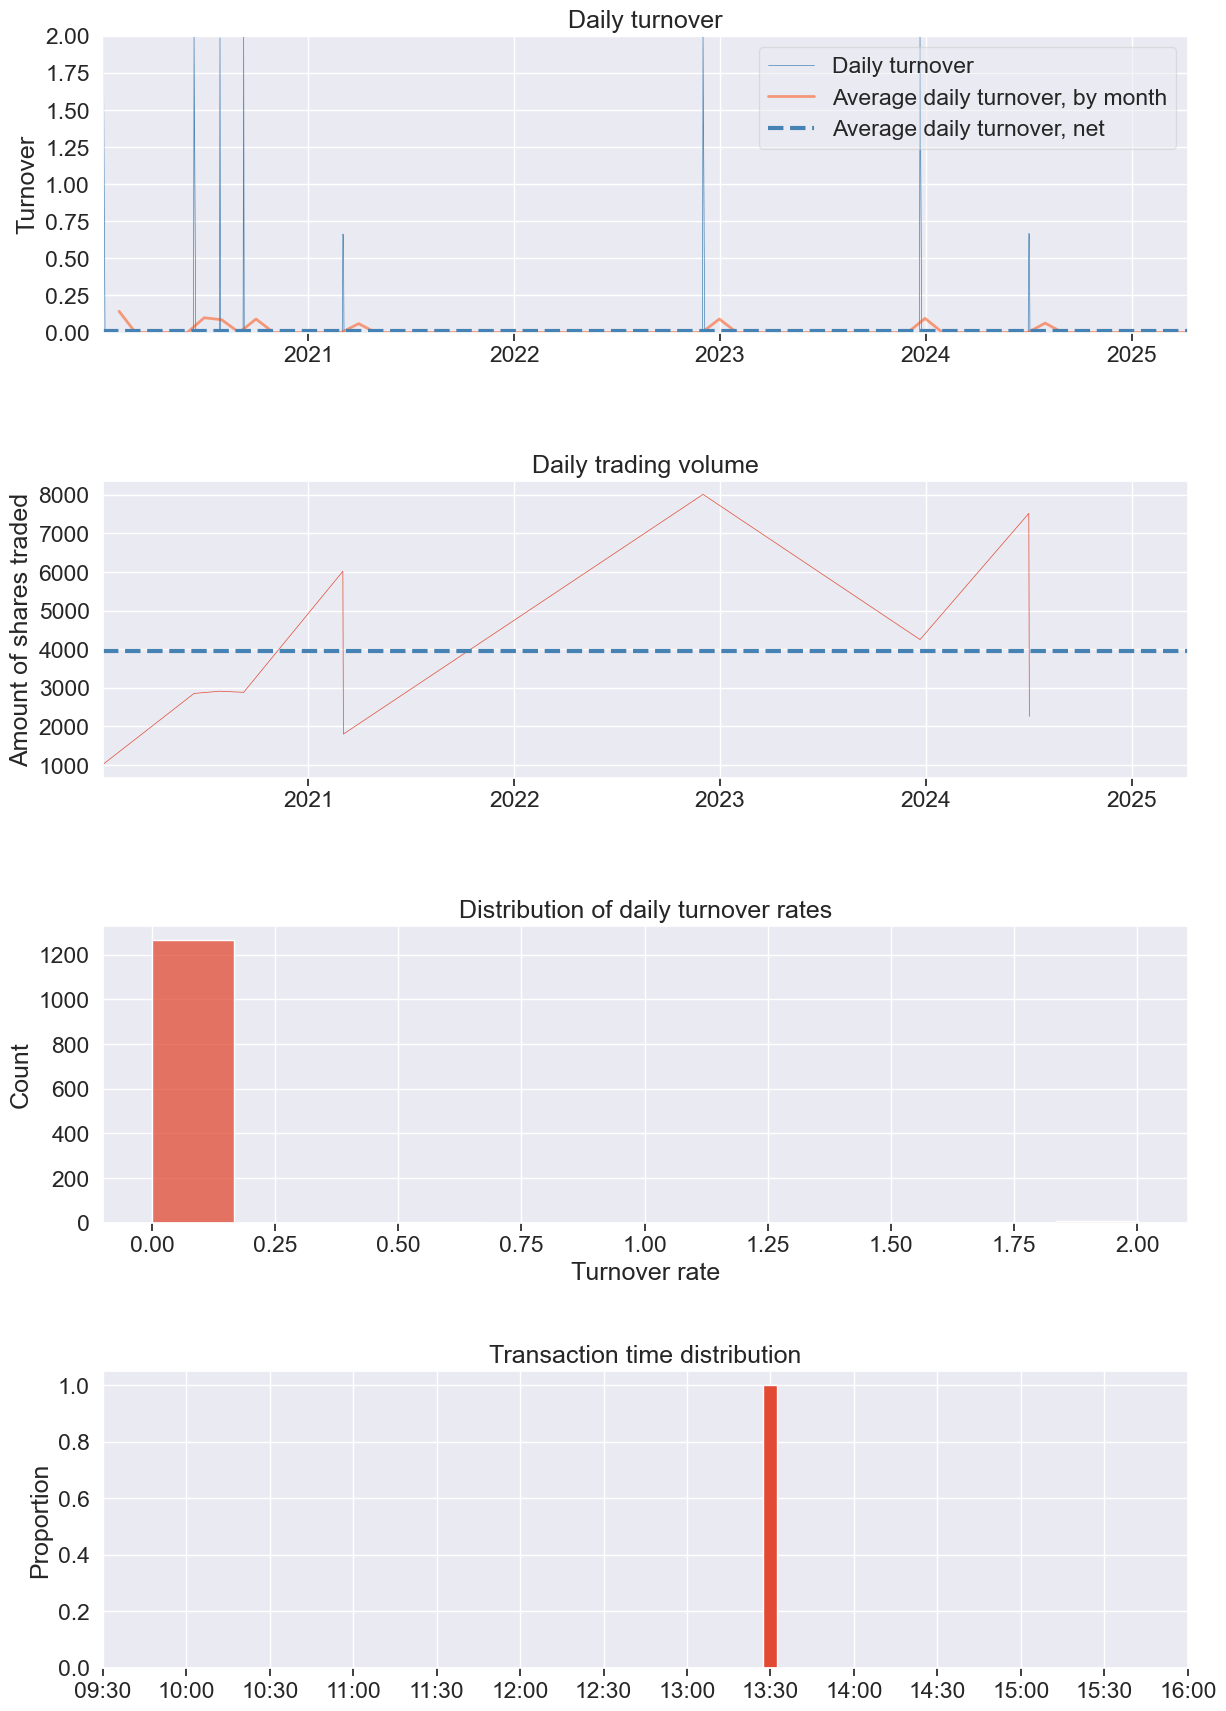

In [139]:
import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return
pyfolio.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )

In [132]:
import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

from pyfolio.plotting import show_perf_stats
perf_stats = show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions, 
    
)

Start date,2020-01-02
End date,2025-04-10
Total months,60
,Backtest
Annual return,28.584%
Cumulative returns,257.524%
Annual volatility,16.179%
Sharpe ratio,1.64
Calmar ratio,1.04
Stability,0.81
Max drawdown,-27.601%


進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 股票部位
Date: 2021-02-26, Score: 40.0, 賣出 股票部位
Date: 2021-02-26, Score: 40.0，買入債券避險
Date: 2022-11-30, Score: 12.0, 買進 股票部位
Date: 2022-11-30, Score: 12.0，賣出債券
Date: 2024-06-28, Score: 38.0, 賣出 股票部位
Date: 2024-06-28, Score: 38.0，買入債券避險


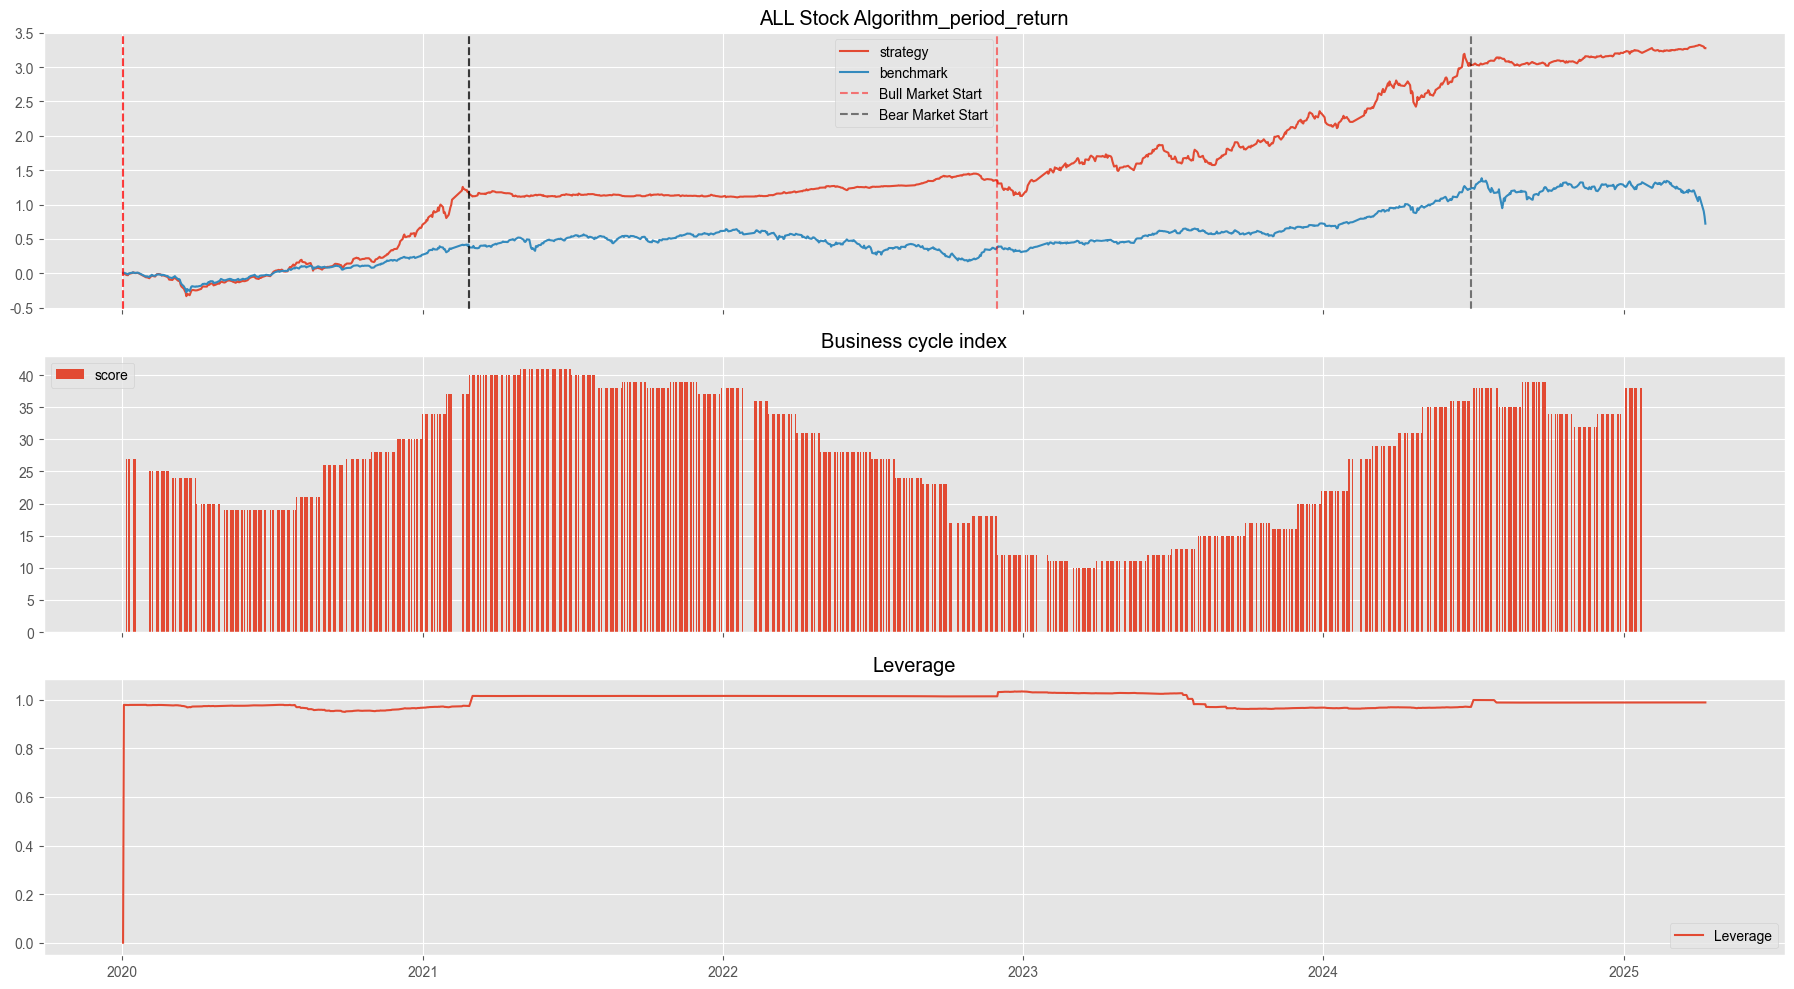

In [133]:
def initialize_com(context, pool = pool):

   set_slippage(slippage.TW_Slippage(spread = 0.3 , volume_limit = 1))
   set_commission(commission.Custom_TW_Commission(min_trade_cost=20, discount=1.0, tax = 0.003))
   set_benchmark(symbol('IR0001'))

   context.i = 0
   context.pool  = pool
   context.state = False
   context.score = None
   context.hedge_state = None

   context.buy_date = []
   context.sell_date = []

   context.a = 0
   context.b = 0

   context.bond = symbol('00865B')
   context.stock = symbol('0050')

   context.semi = None
   context.bio = None
   context.boat = None
   context.cycle1 = False
   context.cycle2 = False

   context.aa = 0
   context.bb = 0

def handle_data_com(context, data, score_data = df):
    backtest_date = data.current_dt.date()
    today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
    context.last_score = context.score  # 記錄舊的 score

    if not today_data.empty:
        context.score = today_data['val_shifted'].iloc[-1]
    else:
        # 若無資料，就沿用舊的 score
        context.score = context.last_score

    record(score=context.score)

    if context.score <= 16 and context.state == False:
        for i in semiconductor_stocks:
            order_target_percent(symbol(i), 1.0 / len(semiconductor_stocks))
        print(f"Date: {backtest_date}, Score: {context.score}, 買進 股票部位")
        context.buy_date.append(pd.to_datetime(backtest_date))
        context.state = True

        if context.hedge_state == True:
            order_target_percent(context.bond, 0)
            print(f"Date: {backtest_date}, Score: {context.score}，賣出債券")
            context.hedge_state = False


    if context.score >= 38 and context.state == True:

        for i in semiconductor_stocks:
            order_target_percent(symbol(i), 0)
        print(f"Date: {backtest_date}, Score: {context.score}, 賣出 股票部位")
        context.sell_date.append(pd.to_datetime(backtest_date))
        context.state = False

        if context.hedge_state == False :
            order_target_percent(context.bond, 1.0)
            print(f"Date: {backtest_date}, Score: {context.score}，買入債券避險")
            context.hedge_state = True



    if context.score > 16 and context.score < 38 and context.a == 0:
        context.a = 1
        print('進入景氣循環')
        if context.state == False:
            for i in semiconductor_stocks:
              order_target_percent(symbol(i), 1.0 / len(semiconductor_stocks))
            print(f"Date: {backtest_date}, Score: {context.score}, 買進 股票部位")
            context.buy_date.append(pd.to_datetime(backtest_date))
            context.state = True

      # 因為 00685B 從 2019-11-25 才開始被交易
    if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.b == 0:
        context.b = 1
        context.hedge_state = False

    record(Leverage = context.account.leverage)

def analyze_com(context, perf):
  plt.style.use('ggplot')
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10), sharex=True)


  axes[0].plot(perf.index, perf['algorithm_period_return'], label = 'strategy')
  axes[0].plot(perf.index, perf['benchmark_period_return'], label = 'benchmark')

  for idx, i in enumerate(context.buy_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'red', label = 'Bull Market Start', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'red', linestyle = '--', alpha = 0.5)

  for idx, i in enumerate(context.sell_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'black', label = 'Bear Market Start', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'black', linestyle = '--', alpha = 0.5)

  axes[0].set_title(f'ALL Stock Algorithm_period_return')
  axes[0].legend()  

  axes[1].bar(perf.index, perf['score'], label='score')
  axes[1].set_title('Business cycle index')
  axes[1].legend()
  axes[2].plot(perf.index, perf['Leverage'], label = 'Leverage')
  axes[2].set_title('Leverage')
  axes[2].legend()
  plt.tight_layout()
  plt.show()
results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-09', tz = 'utc'),
            initialize = initialize_com,
            handle_data = handle_data_com,
            analyze = analyze_com,
            bundle = 'tquant',
            capital_base = 1e5)

In [134]:
import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

from pyfolio.plotting import show_perf_stats
perf_stats = show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions)

Start date,2020-01-02
End date,2025-04-09
Total months,60
,Backtest
Annual return,33.23%
Cumulative returns,327.479%
Annual volatility,17.212%
Sharpe ratio,1.75
Calmar ratio,0.98
Stability,0.88
Max drawdown,-34.071%


### 比較產業輪動 vs 全買半導體 vs 全買 0050

In [17]:
def handle_data_0050(context, data, score_data = df):
  backtest_date = data.current_dt.date()
  today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
  context.last_score = context.score  # 記錄舊的 score

  if not today_data.empty:
    context.score = today_data['val_shifted'].iloc[-1]
  else:
    # 若無資料，就沿用舊的 score
    context.score = context.last_score

  record(score=context.score)

  if context.score <= 16 and context.state == False:
    order_target_percent(context.stock, 1.0)
    print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
    context.buy_date.append(pd.to_datetime(backtest_date))
    context.state = True

    if context.hedge_state == True:
      order_target_percent(context.bond, 0)
      print(f"Date: {backtest_date}, Score: {context.score}，賣出債券")
      context.hedge_state = False


  if context.score >= 38 and context.state == True:
    order_target_percent(context.stock, 0)
    print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
    context.sell_date.append(pd.to_datetime(backtest_date))
    context.state = False

    if context.hedge_state == False :
      order_target_percent(context.bond, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}，買入債券避險")
      context.hedge_state = True



  if context.score > 16 and context.score < 38 and context.a == 0:
    context.a = 1
    print('進入景氣循環')
    if context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

  # 因為 00685B 從 2019-11-25 才開始被交易
  if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.b == 0:
    context.b = 1
    context.hedge_state = False

def analyze_0050(context, perf):
  pass


results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-10', tz = 'utc'),
            initialize = initialize,
            handle_data = handle_data_0050,
            analyze = analyze_0050,
            bundle = 'tquant',
            capital_base = 1e5)

import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

from pyfolio.plotting import show_perf_stats
perf_stats = show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions)

進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050
Date: 2021-02-26, Score: 40.0, 賣出 0050
Date: 2021-02-26, Score: 40.0，買入債券避險
Date: 2022-11-30, Score: 12.0, 買進 0050
Date: 2022-11-30, Score: 12.0，賣出債券
Date: 2024-06-28, Score: 38.0, 賣出 0050
Date: 2024-06-28, Score: 38.0，買入債券避險


Start date,2020-01-02
End date,2025-04-10
Total months,60
,Backtest
Annual return,21.242%
Cumulative returns,165.402%
Annual volatility,14.838%
Sharpe ratio,1.37
Calmar ratio,0.77
Stability,0.90
Max drawdown,-27.601%


進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050 ETF
2020-06-11 : Cycle 2 Start
2020-07-27 : Cycle 2 End
2020-09-07 : Cycle 2 Start
Date: 2021-03-02, Score: 40.0, 賣出 0050
Date: 2021-03-02, Score: 40.0，買入債券避險
Bull Market Ending
Date: 2022-12-01, Score: 12.0, 買進 0050
Date: 2022-12-01, Score: 12.0，賣出債券
2023-12-21 : Cycle 2 Start
Date: 2024-07-01, Score: 38.0, 賣出 0050
Date: 2024-07-01, Score: 38.0，買入債券避險
Bull Market Ending
進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 股票部位
Date: 2021-02-26, Score: 40.0, 賣出 股票部位
Date: 2021-02-26, Score: 40.0，買入債券避險
Date: 2022-11-30, Score: 12.0, 買進 股票部位
Date: 2022-11-30, Score: 12.0，賣出債券
Date: 2024-06-28, Score: 38.0, 賣出 股票部位
Date: 2024-06-28, Score: 38.0，買入債券避險
進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050
Date: 2021-02-26, Score: 40.0, 賣出 0050
Date: 2021-02-26, Score: 40.0，買入債券避險
Date: 2022-11-30, Score: 12.0, 買進 0050
Date: 2022-11-30, Score: 12.0，賣出債券
Date: 2024-06-28, Score: 38.0, 賣出 0050
Date: 2024-06-28, Score: 38.0，買入債券避險


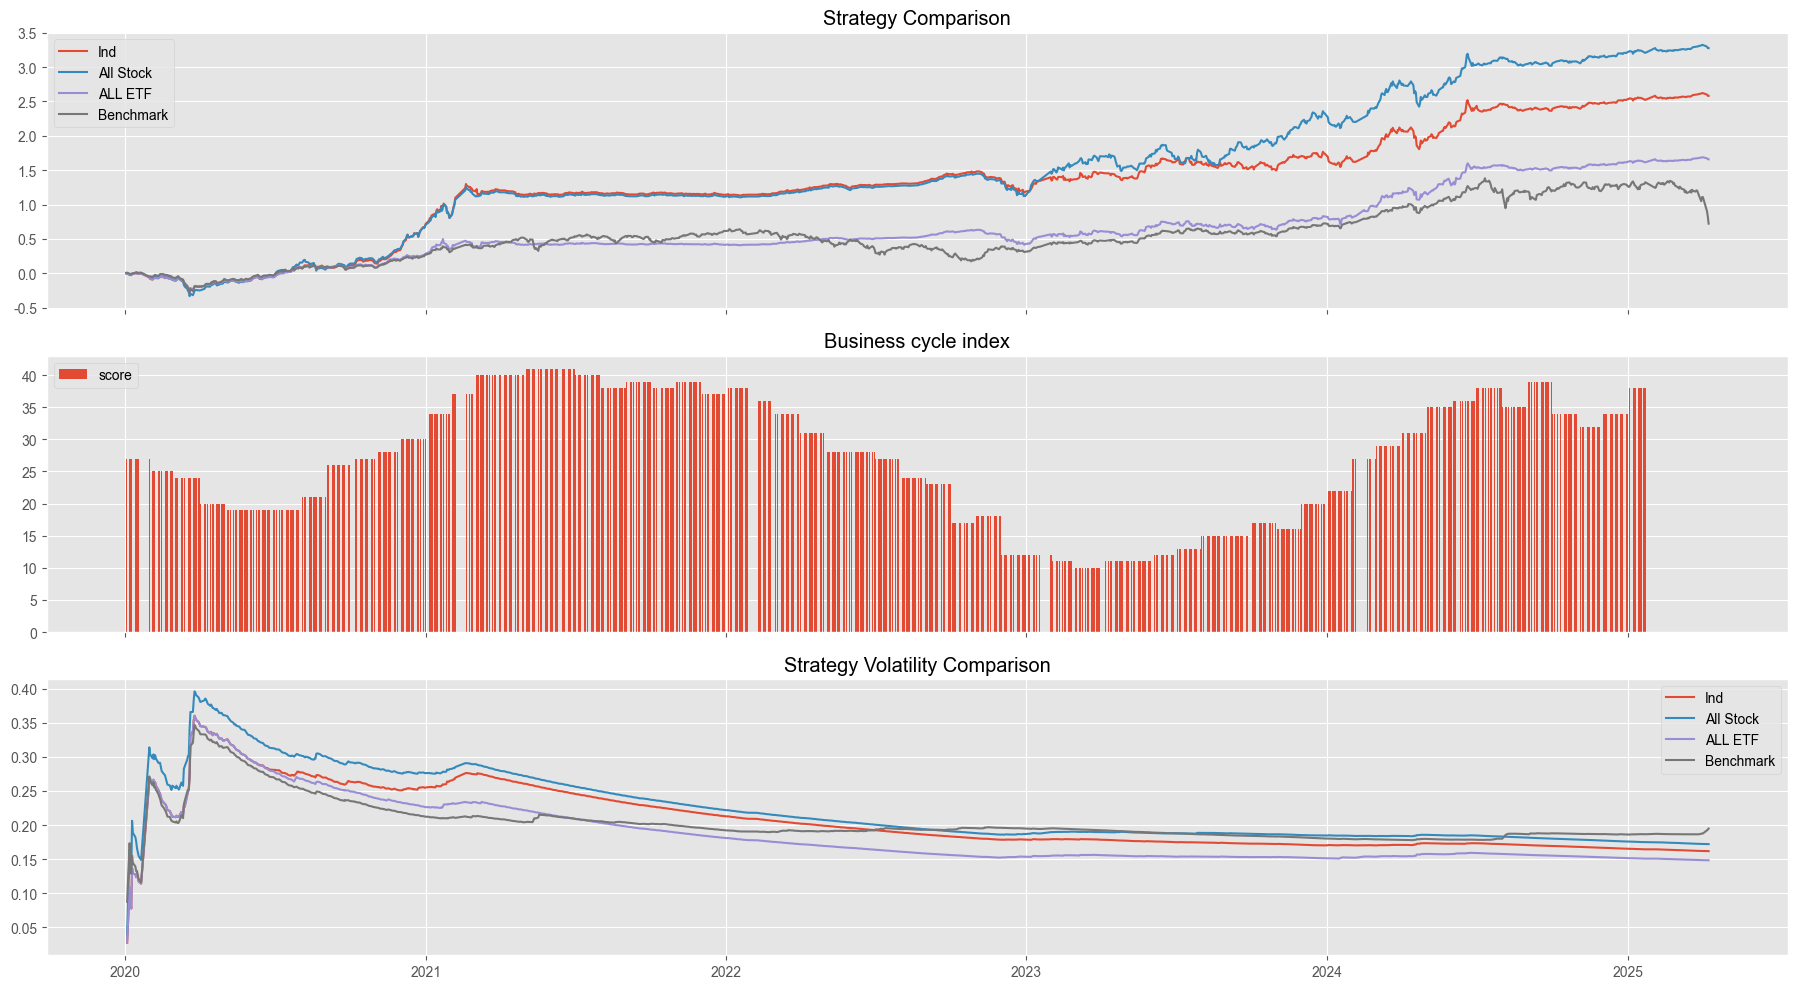

In [136]:
Metrods = [handle_data, handle_data_com, handle_data_0050]
Labels = ['Ind', 'All Stock', 'ALL ETF']
cumu = pd.DataFrame()
vol = pd.DataFrame()
for idx, i in enumerate(Metrods):

    def ana(context, perf):
        cumu[f"{Labels[idx]}"] = perf['algorithm_period_return']
        vol[f"{Labels[idx]}"] = perf['algo_volatility']

        if idx == 0:
            cumu['Benchmark'] = perf['benchmark_period_return']
            cumu['score'] = perf['score']
            vol['Benchmark'] = perf['benchmark_volatility']

    results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-09', tz = 'utc'),
            initialize = initialize,
            handle_data = i,
            analyze = ana,
            bundle = 'tquant',
            capital_base = 1e5)

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10), sharex=True)
for idx , i in enumerate(Labels):

    axes[0].plot(cumu.index, cumu[i], label = i)

axes[0].plot(cumu.index, cumu['Benchmark'], label = 'Benchmark')
axes[0].set_title('Strategy Comparison')
axes[0].legend()

for idx , i in enumerate(Labels):

    axes[2].plot(vol.index, vol[i], label = i)

axes[2].plot(vol.index, vol['Benchmark'], label = 'Benchmark')
axes[2].set_title('Strategy Volatility Comparison')
axes[2].legend()

axes[1].bar(cumu.index, cumu['score'], label='score')
axes[1].set_title('Business cycle index')
axes[1].legend()


plt.tight_layout()
plt.show()


### 策略績效比較與分析

上圖呈現四種策略在回測期間的績效與風險比較：

- **紅色線（Ind）**：本研究設計的「產業輪動策略」，依據航運與半導體之間的資訊傳遞關係進行動態調整。
- **藍色線（All Stock）**：牛市期間單純買入半導體族群個股，熊市出場。
- **紫色線（ALL ETF）**：牛市期間單純持有 0050 ETF 的策略。
- **灰色線（Benchmark）**：大盤報酬作為投資基準線。

從第一張圖的累積報酬表現可看出，**藍色線策略雖然報酬率最高，但伴隨顯著波動風險**。在第三張圖的波動度比較中也觀察到，其大部分時間的波動率均高於其他策略。

相較之下，**本研究提出的產業輪動策略（紅色線）表現穩健且具良好風險控制能力**。雖略低於全股票策略，但明顯高於純 ETF 策略，且波動度位於兩者之間，達成風險與報酬之間的平衡。整體而言，策略未因頻繁調倉而犧牲績效，反而展現出資金流向判斷與時機選擇上的優勢，具有實務應用潛力。

---

### 策略比較表格與分析

| 績效指標 / 策略       | 產業輪動策略 | 牛市半導體策略 | 牛市0050策略 | Benchmark |
|------------------------|----------------|------------------|----------------|------------|
| 年化報酬率             | 28.584%        | 33.23%           | 21.24%         | 12.047%    |
| 累積報酬率             | 257.52%        | 327.48%          | 165.40%        | 77.97%     |
| 年化波動度             | 16.179%        | 17.21%           | 14.84%         | 18.52%     |
| 夏普值                 | 1.64           | 1.75             | 1.37           | 0.71       |
| 卡瑪比率               | 1.04           | 0.98             | 0.77           | 0.45       |
| 最大回撤               | -27.60%        | -34.07%          | -27.60%        | -26.74%    |
| Alpha                  | 0.23           | 0.28             | 0.16           | 0          |
| Beta                   | 0.39           | 0.42             | 0.39           | 0.93       |

> 註：**卡瑪比率（Calmar Ratio）**計算方式為年化報酬率除以期間最大回撤，用以衡量「報酬率對虧損」的比值，概念類似風暴比（Sortino Ratio），數值越高代表策略越具風險效率。

---

本文所提出的**產業輪動策略在多項績效指標中展現出良好的風險報酬平衡**。年化報酬率達 28.58%，略低於牛市期間全買半導體的策略（33.23%），但**明顯高於僅持有 0050 ETF（21.24%）與大盤基準（12.05%）**。

在風險方面，最大回撤為 -27.60%，控制水準與 ETF 策略相當，**顯著優於半導體策略的 -34.07%**。累積報酬率亦達 257.52%，展現良好的長期成長能力。

進一步觀察風險調整後的績效指標：

- **夏普值為 1.64，卡瑪比率為 1.04**，皆優於 ETF 與大盤。
- **卡瑪比率在四項策略中最高**，顯示在可控虧損條件下取得較高年化報酬。
- **Alpha 值達 0.23**，顯示策略具備明顯的市場超額報酬能力。
- **Beta 僅 0.39**，顯示策略波動對市場敏感度低，具有一定的防禦性。

---

綜合以上分析，產業輪動策略**在風險與報酬之間取得良好平衡**，為實務操作上具潛力且穩健的投資方法。


### 金融產業 -> 半導體

In [149]:
def initialize_fin(context, pool = pool):

   set_slippage(slippage.TW_Slippage(spread = 0.3 , volume_limit = 1))
   set_commission(commission.Custom_TW_Commission(min_trade_cost=20, discount=1.0, tax = 0.003))
   set_benchmark(symbol('IR0001'))

   context.i = 0
   context.pool  = pool
   context.state = False
   context.score = None
   context.hedge_state = None

   context.buy_date = []
   context.sell_date = []

   context.a = 0
   context.b = 0

   context.bond = symbol('00865B')
   context.stock = symbol('0050')
   context.market = 'bull'

   context.semi = None
   context.bio = None
   context.boat = None
   context.cycle1 = False
   context.cycle2 = False

   context.aa = 0
   context.bb = 0

   context.cycle_start_date = []
   context.cycle_end_date = []


def handle_data_fin(context, data, score_data = df, ind_data = df_ind):
   backtest_date = data.current_dt.date()
   today_data = score_data[score_data['mdate'] == pd.to_datetime(backtest_date)]
   context.last_score = context.score  # 記錄舊的 score


   if not today_data.empty:
      context.score = today_data['val_shifted'].iloc[-1]
   else:
      # 若無資料，就沿用舊的 score
      context.score = context.last_score

   today_data_2 = ind_data[ind_data['mdate'] == pd.to_datetime(backtest_date)]
   context.semi = today_data_2["IX0028"].iloc[-1]
   context.fin = today_data_2['IX0039'].iloc[-1]
   context.boat = today_data_2['IX0037'].iloc[-1]
   record(score = context.score)



   if context.state == True:

      # ==================================================================
      if context.fin >= 60 and context.cycle1 == False :
         print(f'{backtest_date} : Cycle 1 Start')
         context.cycle_start_date.append(pd.to_datetime(backtest_date))
         context.cycle1 = True
         order_target_percent(symbol('0050'), 0)
         for i in semiconductor_stocks:
            order_target_percent(symbol(i), 1.0 / len(semiconductor_stocks))
         context.a = context.semi

      if context.cycle1 == True and context.semi >= context.a + 15:
         print(f'{backtest_date} : Cycle 1 End')
         context.cycle_end_date.append(pd.to_datetime(backtest_date))
         context.cycle1 = False
         for i in semiconductor_stocks:
            order_target_percent(symbol(i), 0)
         order_target_percent(symbol('0050'), 1.0)

      
      # ==================================================================


   if context.hedge_state == True and context.cycle1 == True:
      print(f'Bull Market Ending')
      #context.end_date.append(pd.to_datetime(backtest_date))
      for i in semiconductor_stocks:
         order_target_percent(symbol(i), 0)
      order_target_percent(symbol('0050'), 0)
      context.cycle1 = False


   
   # ==================================================================


   if context.score <= 16 and context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

      if context.hedge_state == True:
         order_target_percent(context.bond, 0)
         print(f"Date: {backtest_date}, Score: {context.score}，賣出債券")
         context.hedge_state = False


   if context.score >= 38 and context.state == True:
      order_target_percent(context.stock, 0)
      print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
      context.sell_date.append(pd.to_datetime(backtest_date))
      context.state = False

      if context.hedge_state == False :
         order_target_percent(context.bond, 1.0)
         print(f"Date: {backtest_date}, Score: {context.score}，買入債券避險")
         context.hedge_state = True



   if context.score > 16 and context.score < 38 and context.aa == 0:
      context.aa = 1
      print('進入景氣循環')
      if context.state == False:
         order_target_percent(context.stock, 1.0)
         print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050 ETF")
         context.buy_date.append(pd.to_datetime(backtest_date))
         context.state = True

  # 因為 00685B 從 2019-11-25 才開始被交易
   if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.bb == 0:
     context.bb = 1
     context.hedge_state = False

   record(Leverage = context.account.leverage)

進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050 ETF
2020-01-03 : Cycle 1 Start
Date: 2021-03-02, Score: 40.0, 賣出 0050
Date: 2021-03-02, Score: 40.0，買入債券避險
Bull Market Ending
Date: 2022-12-01, Score: 12.0, 買進 0050
Date: 2022-12-01, Score: 12.0，賣出債券
2023-01-06 : Cycle 1 Start
2024-03-08 : Cycle 1 End
2024-03-14 : Cycle 1 Start
Date: 2024-07-01, Score: 38.0, 賣出 0050
Date: 2024-07-01, Score: 38.0，買入債券避險
Bull Market Ending


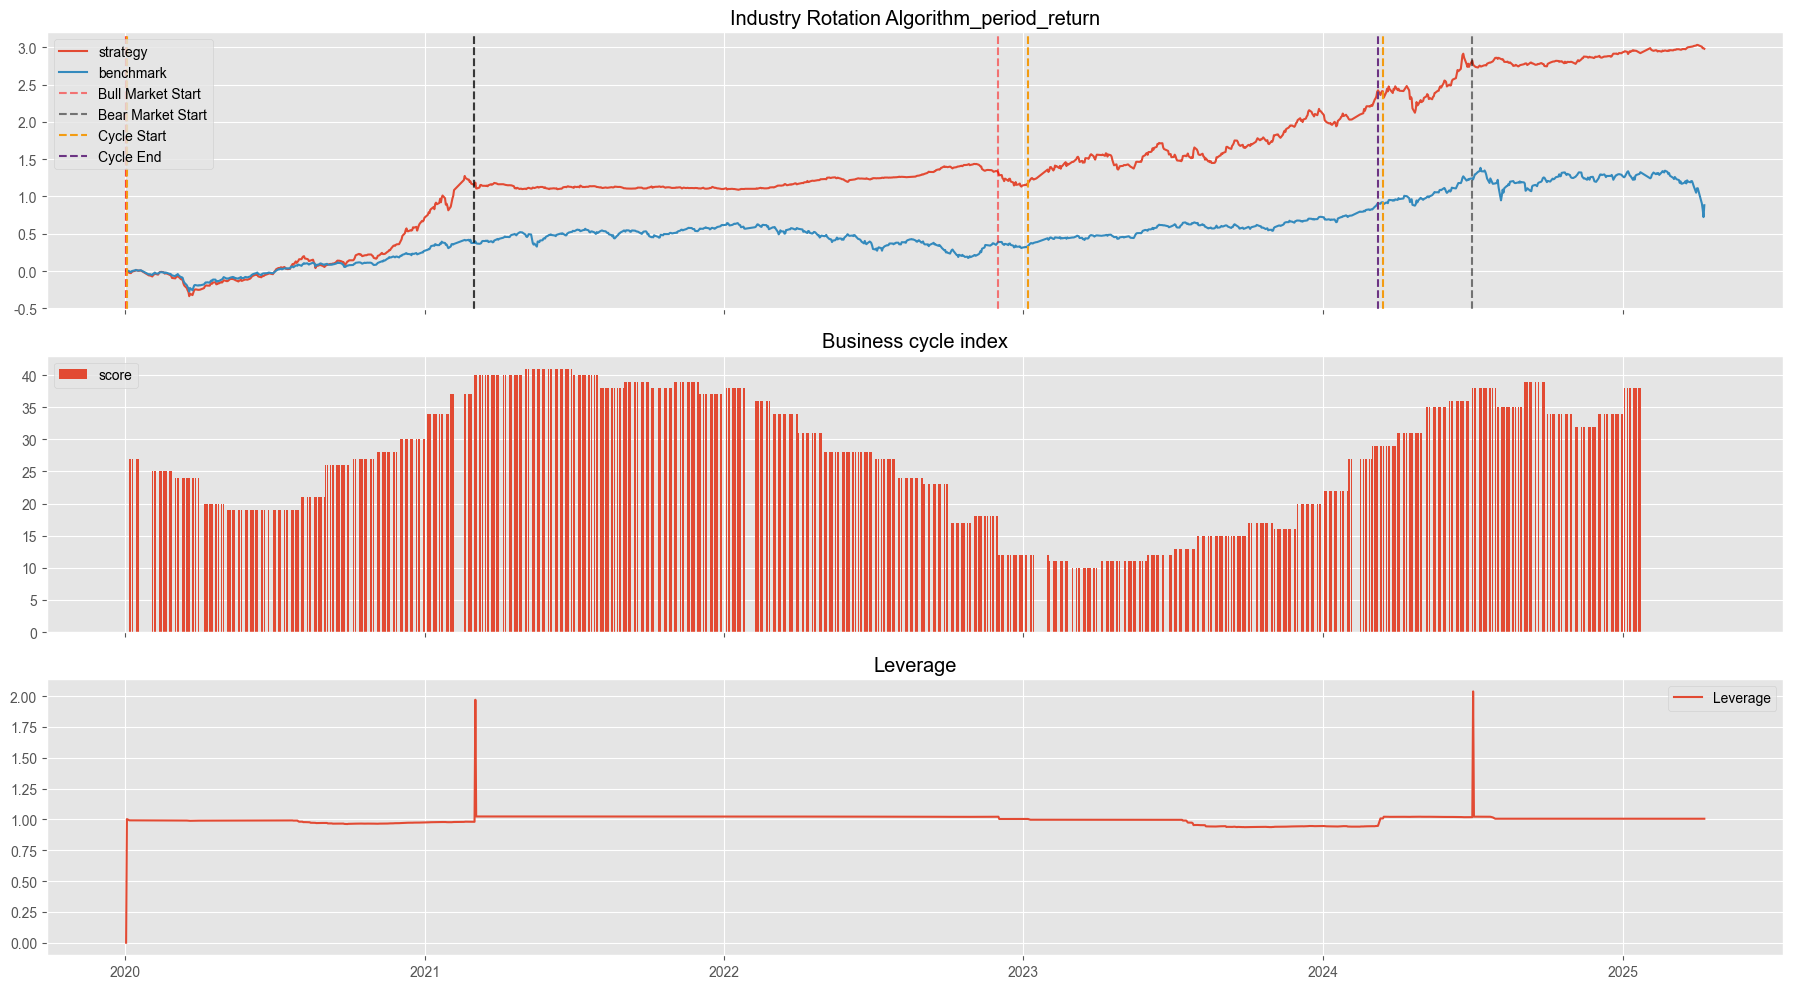

Index(['period_open', 'period_close', 'net_leverage', 'short_value',
       'benchmark_return', 'treasury_return', 'ending_cash', 'longs_count',
       'shorts_count', 'gross_leverage', 'long_exposure', 'pnl',
       'short_exposure', 'transactions', 'capital_used', 'positions',
       'long_value', 'starting_exposure', 'ending_exposure', 'returns',
       'orders', 'portfolio_value', 'ending_value', 'starting_cash',
       'starting_value', 'score', 'Leverage', 'trading_days',
       'benchmark_period_return', 'excess_return', 'benchmark_volatility',
       'treasury_period_return', 'max_drawdown', 'period_label', 'sortino',
       'max_leverage', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'beta', 'sharpe'],
      dtype='object')


In [151]:
def analyze_fin(context, perf):
  plt.style.use('ggplot')
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10), sharex=True)


  axes[0].plot(perf.index, perf['algorithm_period_return'], label = 'strategy')
  axes[0].plot(perf.index, perf['benchmark_period_return'], label = 'benchmark')

  for idx, i in enumerate(context.buy_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'red', label = 'Bull Market Start', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'red', linestyle = '--', alpha = 0.5)

  for idx, i in enumerate(context.sell_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'black', label = 'Bear Market Start', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'black', linestyle = '--', alpha = 0.5)

  for idx, i in enumerate(context.cycle_start_date):
    if idx == 0:
      axes[0].axvline(x = i, linestyle = '--', color = '#F39C12', label = 'Cycle Start')
    else:
      axes[0].axvline(x = i, linestyle = '--', color = '#F39C12')

  for idx, i in enumerate(context.cycle_end_date):
    if idx == 0:
      axes[0].axvline(x = i, linestyle = '--', color = '#6C3483', label = 'Cycle End')
    else:
      axes[0].axvline(x = i, linestyle = '--', color = '#6C3483')
        
  axes[0].set_title(f'Industry Rotation Algorithm_period_return')
  axes[0].legend()  

  axes[1].bar(perf.index, perf['score'], label='score')
  axes[1].set_title('Business cycle index')
  axes[1].legend()
  

  axes[2].plot(perf.index, perf['Leverage'], label = 'Leverage')
  axes[2].set_title('Leverage')
  axes[2].legend()
  plt.tight_layout()
  plt.show()
  print(perf.columns)


results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-10', tz = 'utc'),
            initialize = initialize_fin,
            handle_data = handle_data_fin,
            analyze = analyze_fin,
            bundle = 'tquant',
            capital_base = 1e5)

### benchmark

In [21]:
def initialize_b(context, pool = pool):

   set_slippage(slippage.TW_Slippage(spread = 0.3 , volume_limit = 1))
   set_commission(commission.Custom_TW_Commission(min_trade_cost=20, discount=1.0, tax = 0.003))
   set_benchmark(symbol('IR0001'))

   context.i = 0

def handle_data_benchmark(context, data, score_data = df):
    if context.i == 0:
        order_target_percent(symbol('IR0001'), 1)
    context.i += 1


def analyze_b(context, perf):
  pass


results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-10', tz = 'utc'),
            initialize = initialize_b,
            handle_data = handle_data_benchmark,
            analyze = analyze_b,
            bundle = 'tquant',
            capital_base = 1e5)

import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

from pyfolio.plotting import show_perf_stats
perf_stats = show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions)

Start date,2020-01-02
End date,2025-04-10
Total months,60
,Backtest
Annual return,12.047%
Cumulative returns,77.969%
Annual volatility,18.52%
Sharpe ratio,0.71
Calmar ratio,0.45
Stability,0.79
Max drawdown,-26.74%
